In [1]:
import pandas as pd
import numpy as np
import sys
from IPython.display import Image


# I created the mxbgenomes module where I will 
# put the python code that
# I will use across this proyect to keep things organized
sys.path.append('../../')
from mxbgenomes.tractslength import collapse_windows_to_tracks

# Tracts length distribution plot

In this notebook, I generate a plot for the ancestry track length distribution.


## XGMix output

Previosly I ran XGMix to infere local ancestry. 
Below is a plot of LAI for an individual from 1TGP. This individual is from PEL.

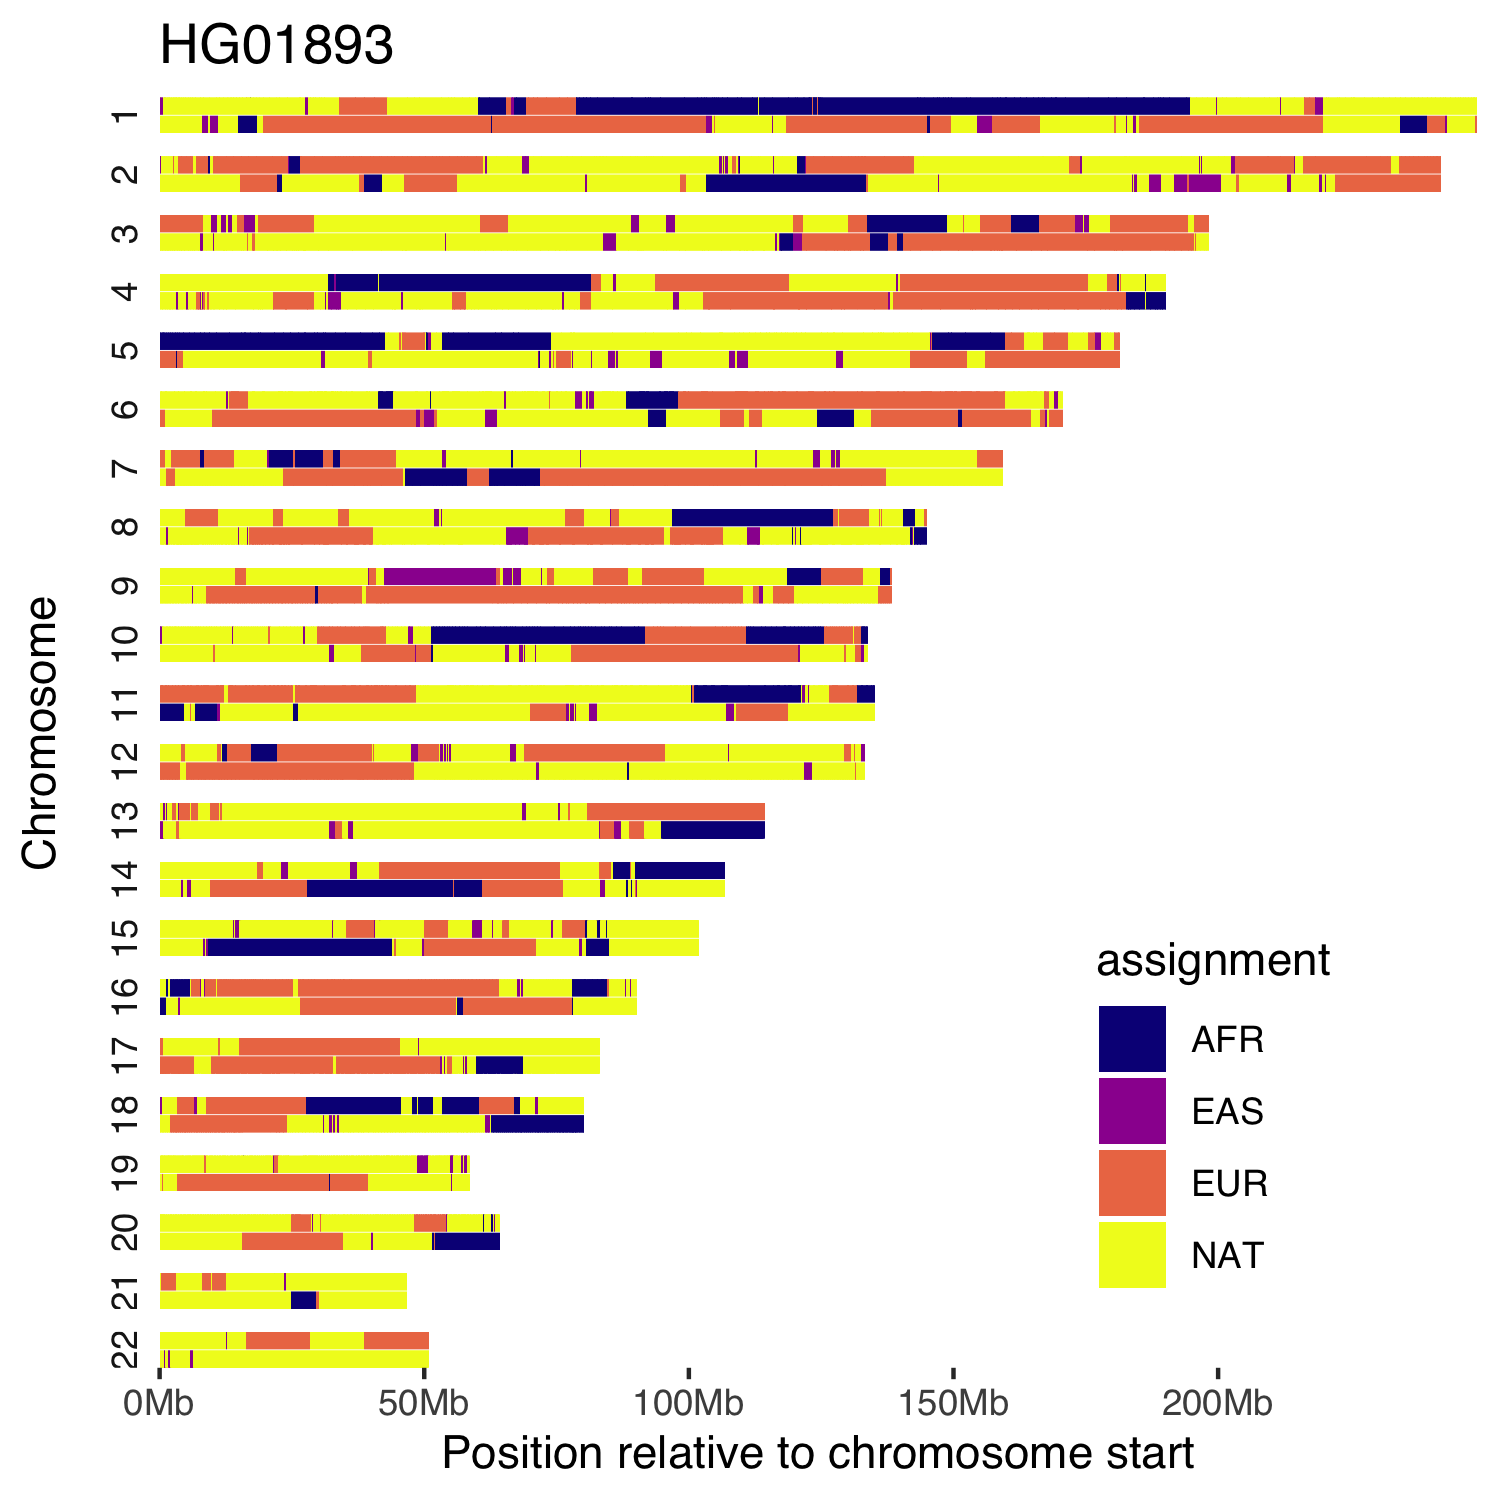

In [2]:
Image('../210322-LocalAncestryVisuzlization/test.png', width=500)

[XGMix](https://github.com/AI-sandbox/XGMix) outputs a msp file. This file contain the predicted local ancestry for each interval of genetic position in centiMorgans. 

I processed this file, so there is one per individual.

In [3]:
processed_file = '../210322-LocalAncestryVisuzlization/data/bed/allchrn-HG01893.tsv'

bed = pd.read_table(processed_file)
bed.head(n=10)

,chm,spos,epos,assignment,sgpos,egpos,Individual,Haplotype
0,1,10120,148116,NAT,0.00000,0.19785,HG01893,0
1,1,10120,148116,NAT,0.00000,0.19785,HG01893,1
2,1,148253,618613,NAT,0.19809,1.44612,HG01893,0
3,1,148253,618613,EAS,0.19809,1.44612,HG01893,1
4,1,618620,811809,NAT,1.44615,2.00106,HG01893,0
5,1,618620,811809,NAT,1.44615,2.00106,HG01893,1
6,1,811918,900370,NAT,2.00135,2.22558,HG01893,0
7,1,811918,900370,EAS,2.00135,2.22558,HG01893,1
8,1,900438,1002833,NAT,2.22586,2.54124,HG01893,0
9,1,900438,1002833,NAT,2.22586,2.54124,HG01893,1


In [4]:
# data for one haplotype chromosome 22
hap_1_chm_22 = bed[(bed.Haplotype == 0) & (bed.chm == 22)]
hap_1_chm_22.head(n=10)

,chm,spos,epos,assignment,sgpos,egpos,Individual,Haplotype
34698,22,10519276,10725155,NAT,1.45776,1.45776,HG01893,0
34700,22,10725162,10960160,NAT,1.45776,1.45776,HG01893,0
34702,22,10960181,11276951,NAT,1.45776,1.45776,HG01893,0
34704,22,11276958,11323010,EAS,1.45776,1.45776,HG01893,0
34706,22,11323247,11362967,EAS,1.45776,1.45776,HG01893,0
34708,22,11362992,11588579,EAS,1.45776,1.45776,HG01893,0
34710,22,11588580,11618666,EAS,1.45776,1.45776,HG01893,0
34712,22,11618676,11705359,NAT,1.45776,1.45776,HG01893,0
34714,22,11705361,11824549,NAT,1.45776,1.45776,HG01893,0
34716,22,11824552,11938046,NAT,1.45776,1.45776,HG01893,0


## Collapsing windows to continuous ancestry tracts

XGMix divides the genomes into windows and predicts the local ancestry for each window. If one window follows the other then, ideally, the end position of the preceding window should be the start position of the next window. It seems that in most cases there is always a gap between two successive windows.

I wrote [some code](https://github.com/santiago1234/mxb-genomes/blob/main/mxbgenomes/tractslength.py) to collapse continuous windows into a single track, if all the windows represent the same ancestry. I am not sure if for running Tracts, if have to do this operation. Also, I could be more rigorous in the way that I am collapsing the windows.


In [5]:
# collapse windows

collapse_windows_to_tracks(hap_1_chm_22)

,chm,spos,epos,assignment,sgpos,egpos,Individual,Haplotype,len_bp,len_cm
0,22,10519276,11276951,NAT,1.45776,1.45776,HG01893,0,757675,0.00000
1,22,11276958,11618666,EAS,1.45776,1.45776,HG01893,0,341708,0.00000
2,22,11618676,12150167,NAT,1.45776,1.45776,HG01893,0,531491,0.00000
3,22,12150167,12543500,EAS,1.45776,1.45776,HG01893,0,393333,0.00000
4,22,12543520,16209226,NAT,1.45776,1.56633,HG01893,0,3665706,0.10857
5,22,16209232,16853162,EAS,1.56633,2.20784,HG01893,0,643930,0.64151


Now, there are only six tracts as shown in the karyogram plot above.

In [6]:
# run collapsing for all the genome
# I need to group the data by chromosome and haplotype

tracts = (
    bed
    .groupby(['chm', 'Haplotype'])
    .apply(collapse_windows_to_tracks)
    .reset_index(drop=True)
)
tracts.head(10)

,chm,spos,epos,assignment,sgpos,egpos,Individual,Haplotype,len_bp,len_cm
0,1,10120,8013850,NAT,0.00000,18.47852,HG01893,0,8003730,18.47852
1,1,8013869,9137485,EAS,18.47852,19.96893,HG01893,0,1123616,1.49041
2,1,9137549,9545918,NAT,19.96895,21.22621,HG01893,0,408369,1.25726
3,1,9545921,10994003,EAS,21.22621,23.55105,HG01893,0,1448082,2.32484
4,1,10994039,14824265,NAT,23.55176,31.71523,HG01893,0,3830226,8.16347
5,1,14824401,18439552,AFR,31.71599,39.57952,HG01893,0,3615151,7.86353
6,1,18439569,19622785,NAT,39.57953,42.37827,HG01893,0,1183216,2.79874
7,1,19622945,62700430,EUR,42.37830,92.04932,HG01893,0,43077485,49.67102
8,1,62700454,62891838,AFR,92.04932,92.11053,HG01893,0,191384,0.06121
9,1,62892374,103320619,EUR,92.11079,131.32649,HG01893,0,40428245,39.21570


## Tract length distribution

I still need to do more reading to understand well the Centimorgans distance. In the function collapse_windows_to_tracks. I computed the column len_cm by simply subtracting the start position [`collapse_windows_to_tracks`](https://github.com/santiago1234/mxb-genomes/blob/main/mxbgenomes/tractslength.py) from the end position (cm).

In [7]:
# define the bins, 
# to compute the tract len distribution
n_bins = 30
bins = np.linspace(start=0, stop=150, num=n_bins)
tracts['bins_cm'] = pd.cut(tracts.len_cm, bins, labels=bins.round()[:-1])
tracts.sample(10)

,chm,spos,epos,assignment,sgpos,egpos,Individual,Haplotype,len_bp,len_cm,bins_cm
123,2,24550053,26456230,AFR,48.52734,49.48599,HG01893,1,1906177,0.95865,0.0
601,11,70257,12231877,EUR,0.00000,23.61658,HG01893,1,12161620,23.61658,21.0
498,9,113994717,115866061,NAT,122.56047,125.31661,HG01893,0,1871344,2.75614,0.0
275,4,181305409,181446492,NAT,192.20392,192.50994,HG01893,1,141083,0.30602,0.0
730,14,91682441,99109891,NAT,89.66806,105.44861,HG01893,1,7427450,15.78055,16.0
347,6,52446850,61630271,NAT,73.83077,78.37577,HG01893,0,9183421,4.54500,0.0
617,12,3779769,4990391,NAT,9.41789,12.98473,HG01893,0,1210622,3.56684,0.0
937,20,54222084,54446402,EAS,81.74341,82.01738,HG01893,1,224318,0.27397,0.0
957,22,10519276,11276951,NAT,1.45776,1.45776,HG01893,0,757675,0.00000,NaN
1,1,8013869,9137485,EAS,18.47852,19.96893,HG01893,0,1123616,1.49041,0.0


In [8]:
# compute the frequency per bin
tract_len_dist = tracts.groupby(['assignment']).bins_cm.value_counts()

tract_len_dist = tract_len_dist.to_frame().rename({'bins_cm': 'x'}, axis=1).reset_index()
tract_len_dist.to_csv('data/tractlen-HG01893.csv', index=False)

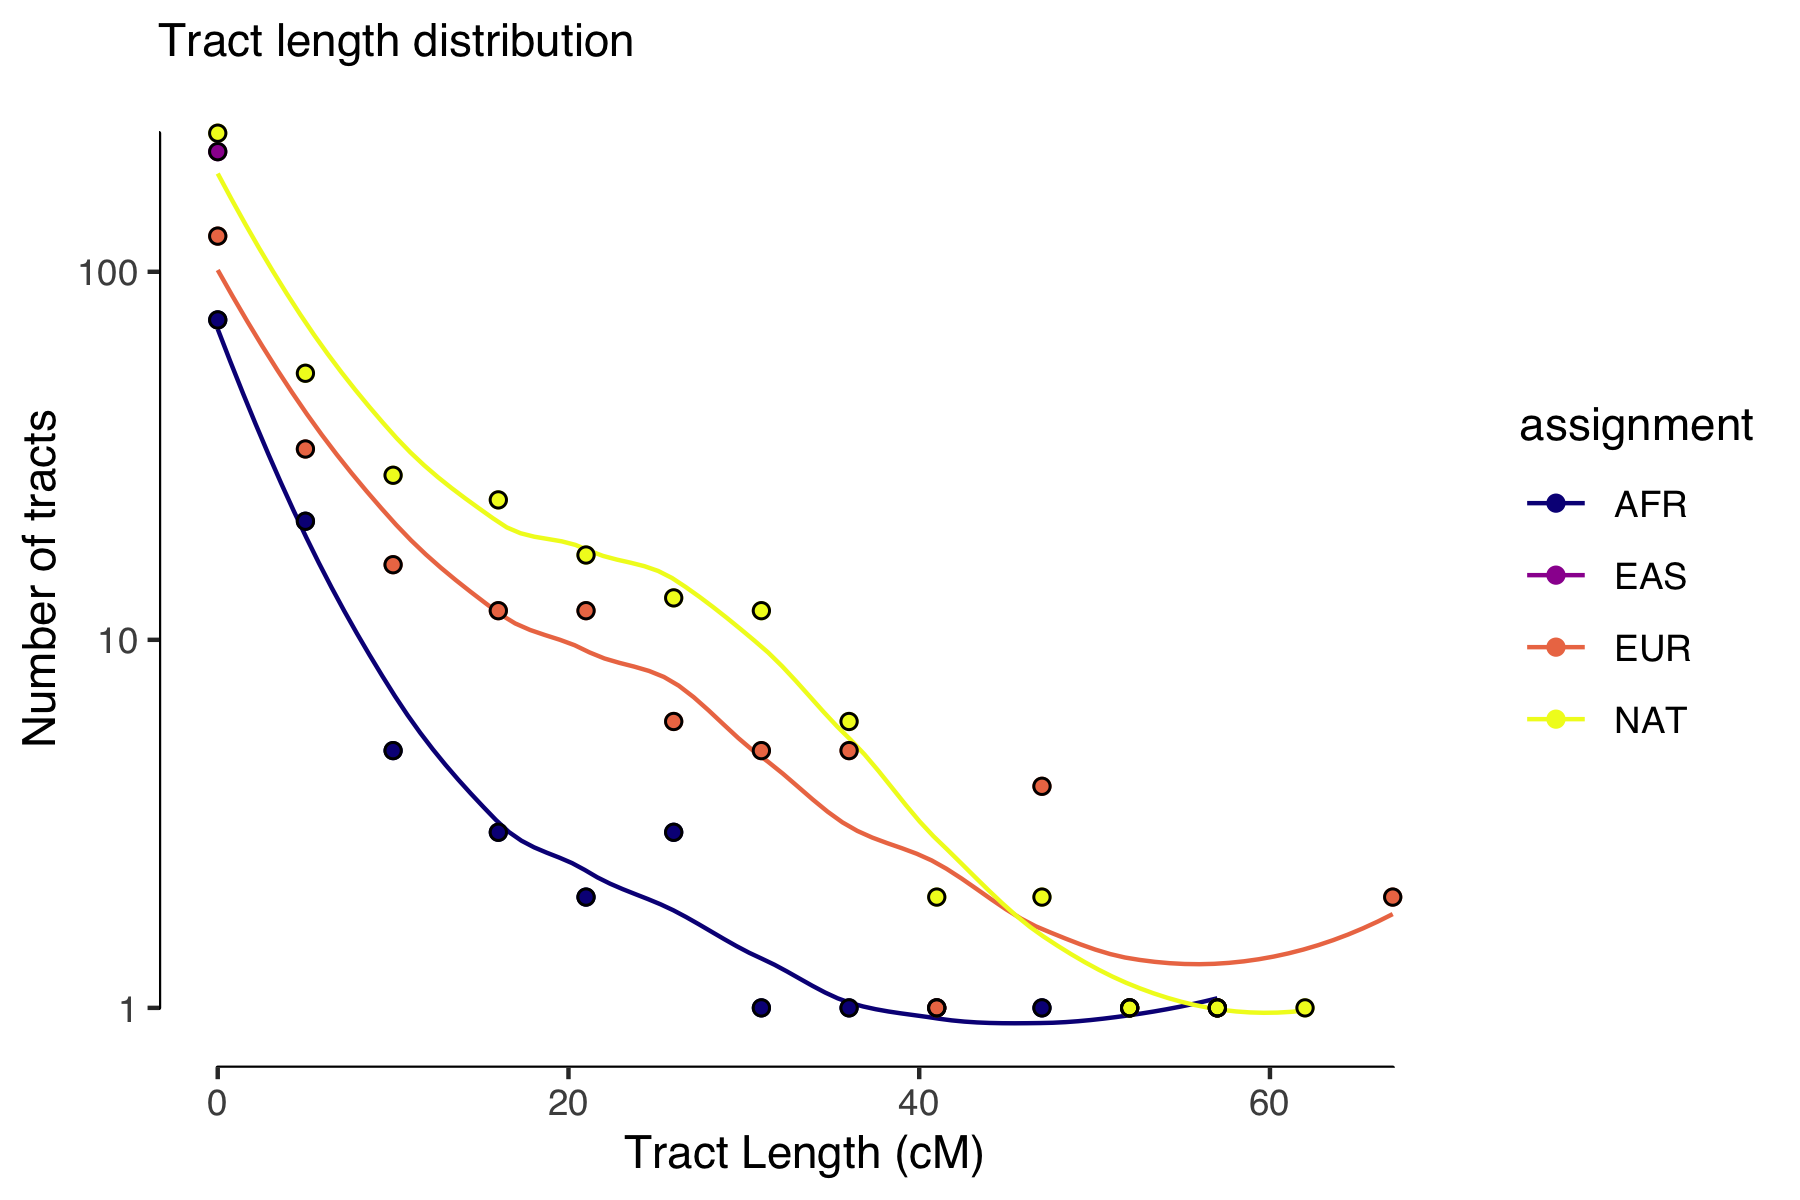

In [9]:
# I generated the plot with ggplot, script: plot_tracts_len.R
Image('plots/tractlen-HG01893.png', width=700)